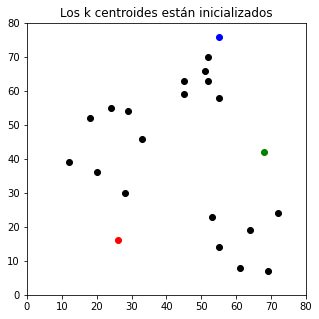

In [1]:
## Inicialización la librerias 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
 
df = pd.DataFrame({
    'x1': [12, 20, 28, 18, 29, 33, 24, 45, 45, 52, 51, 52, 55, 53, 55, 61, 64, 69, 72],
    'x2': [39, 36, 30, 52, 54, 46, 55, 59, 63, 70, 66, 63, 58, 23, 14, 8, 19, 7, 24]
})
 
np.random.seed(200)
# Número de centroides k = 3
k = 3
# Inicializamos los centroides a valores aleatorios en el espacio de datos
centroids = {
    i+1: [np.random.randint(0, 80), np.random.randint(0, 80)]
    for i in range(k)
}
     
fig = plt.figure(figsize=(5, 5))
plt.scatter(df['x1'], df['x2'], color='k')
colmap = {1: 'r', 2: 'g', 3: 'b'}
for i in centroids.keys():
    plt.scatter(*centroids[i], color=colmap[i])
plt.title(u'Los k centroides están inicializados')
plt.xlim(0, 80)
plt.ylim(0, 80)
plt.show()


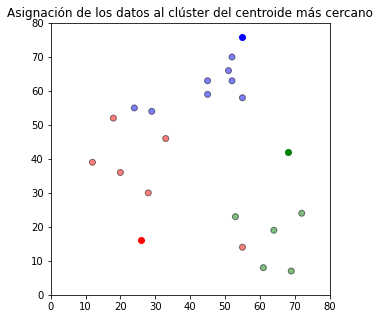

In [2]:
## Asignación de las observaciones a los centroides
 
def asignacion(df, centroids):
    for i in centroids.keys():
        df['distance_from_{}'.format(i)] = (
            np.sqrt(
                (df['x1'] - centroids[i][0]) ** 2
                + (df['x2'] - centroids[i][1]) ** 2
            )
        )
    centroid_distance_cols = ['distance_from_{}'.format(i) for i in centroids.keys()]
    df['closest'] = df.loc[:, centroid_distance_cols].idxmin(axis=1)
    df['closest'] = df['closest'].map(lambda x: int(x.lstrip('distance_from_')))
    df['color'] = df['closest'].map(lambda x: colmap[x])
    return df
 
df = asignacion(df, centroids)
 
fig = plt.figure(figsize=(5, 5))
plt.scatter(df['x1'], df['x2'], color=df['color'], alpha=0.5, edgecolor='k')
for i in centroids.keys():
    plt.scatter(*centroids[i], color=colmap[i])
plt.title(u'Asignación de los datos al clúster del centroide más cercano')
plt.xlim(0, 80)
plt.ylim(0, 80)
plt.show()


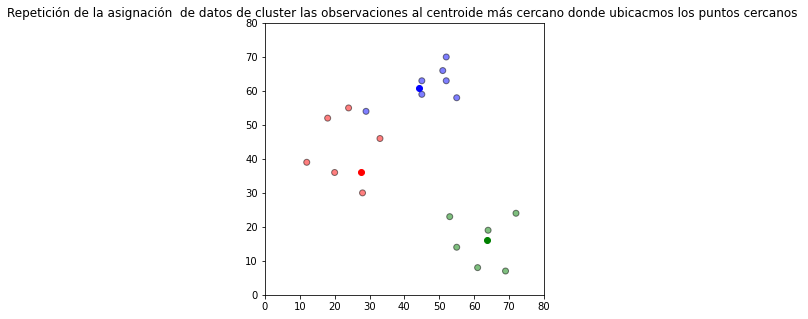

In [5]:
## Repetición de la asignación de las observaciones al centroide más cercano
 
df = asignacion(df, centroids)
 
# Representación de resultados
fig = plt.figure(figsize=(5, 5))
plt.scatter(df['x1'], df['x2'], color=df['color'], alpha=0.5, edgecolor='k')
for i in centroids.keys():
    plt.scatter(*centroids[i], color=colmap[i])
plt.title(u'Repetición de la asignación  de datos de cluster las observaciones al centroide más cercano donde ubicacmos los puntos cercanos ')
plt.xlim(0, 80)
plt.ylim(0, 80)
plt.show()
